In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../output/pipeline_run_history.csv')

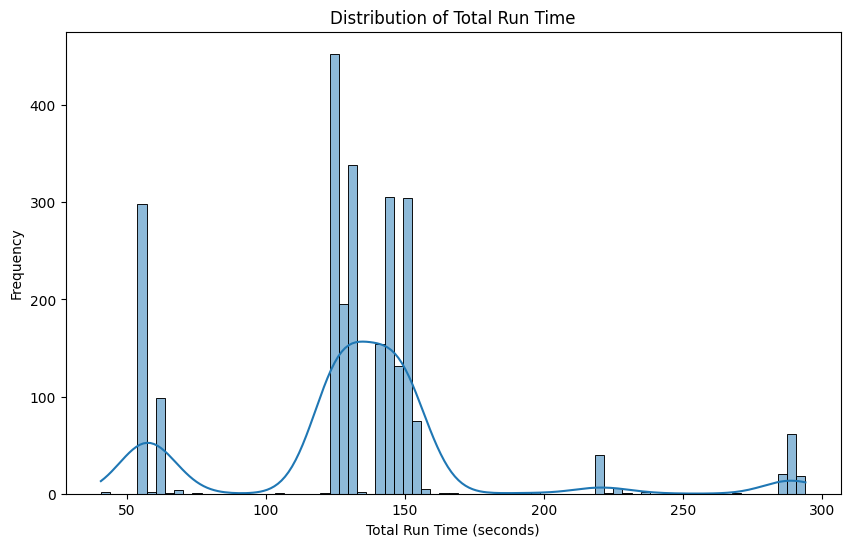

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_run_time'], kde=True)
plt.title('Distribution of Total Run Time')
plt.xlabel('Total Run Time (seconds)')
plt.ylabel('Frequency')
plt.show()

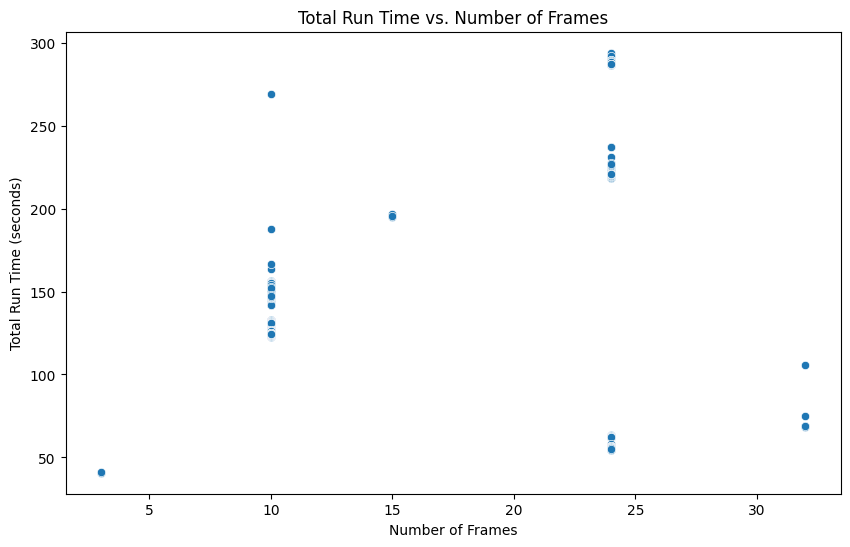

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_frames', y='total_run_time')
plt.title('Total Run Time vs. Number of Frames')
plt.xlabel('Number of Frames')
plt.ylabel('Total Run Time (seconds)')
plt.show()

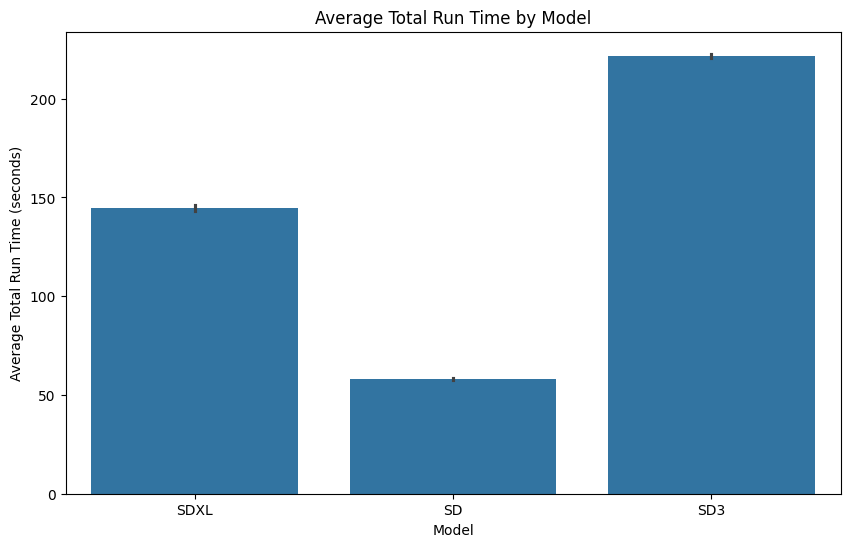

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='model', y='total_run_time')
plt.title('Average Total Run Time by Model')
plt.xlabel('Model')
plt.ylabel('Average Total Run Time (seconds)')
plt.show()

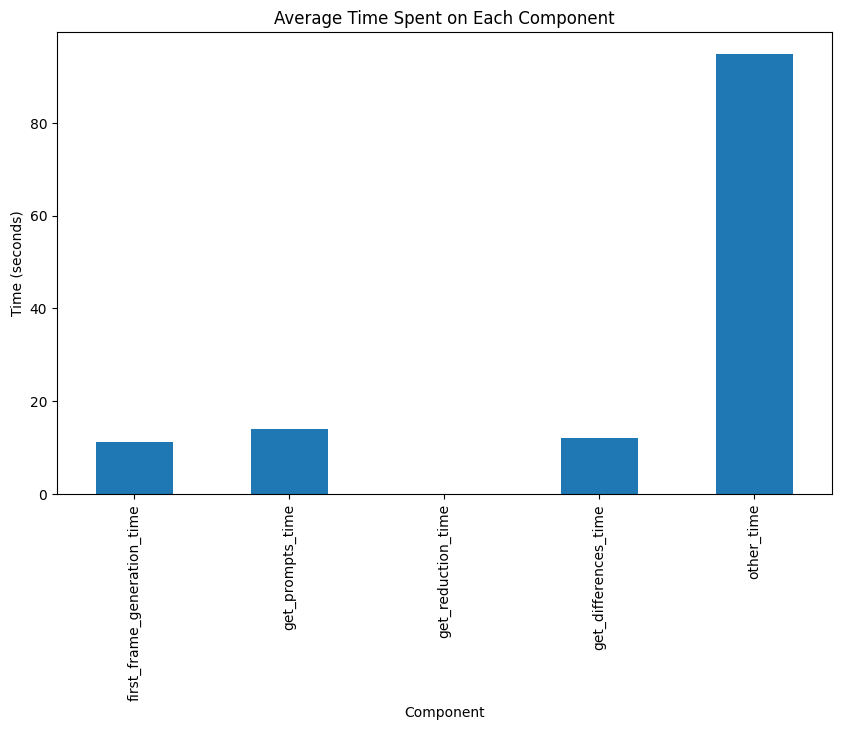

In [7]:
time_components = ['first_frame_generation_time', 'get_prompts_time', 
                   'get_reduction_time', 'get_differences_time']

df['other_time'] = df['total_run_time'] - df[time_components].sum(axis=1)

component_times = df[time_components + ['other_time']]

component_times_mean = component_times.mean()

plt.figure(figsize=(10, 6))
component_times_mean.plot(kind='bar')
plt.title('Average Time Spent on Each Component')
plt.xlabel('Component')
plt.ylabel('Time (seconds)')
plt.show()

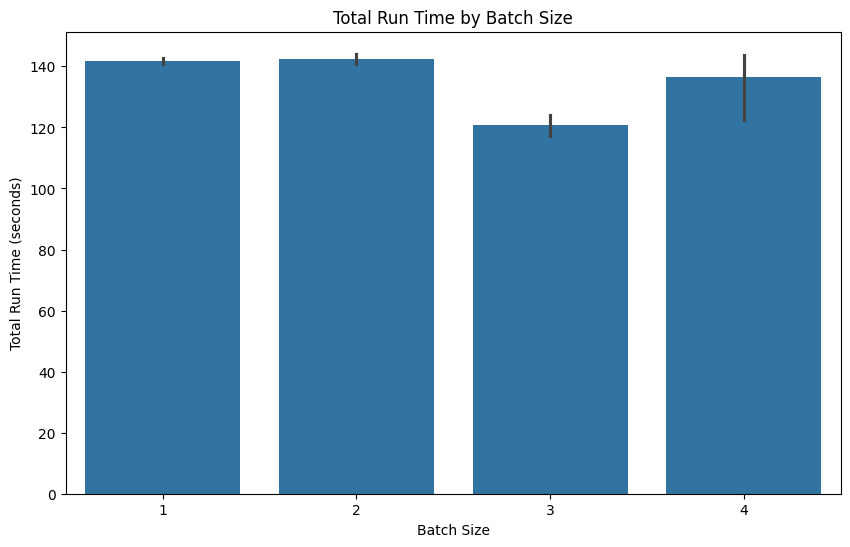

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='batch_size', y='total_run_time')
plt.title('Total Run Time by Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Total Run Time (seconds)')
plt.show()

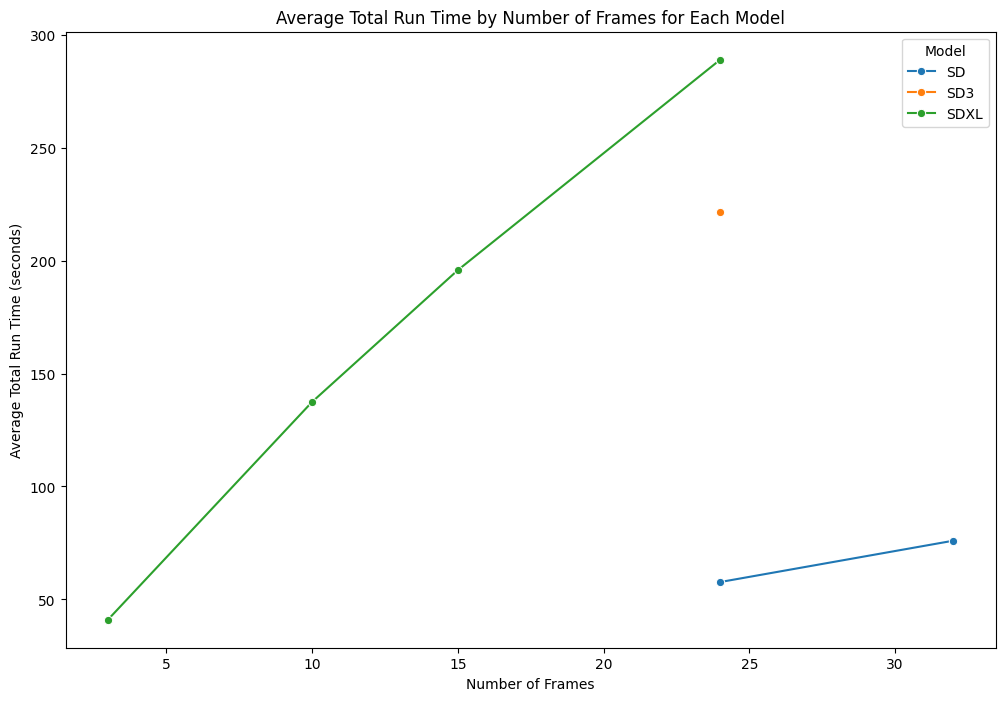

In [9]:
# Group by 'model' and 'num_frames' and calculate the mean 'total_run_time'
runtime_by_frames = df.groupby(['model', 'num_frames'])['total_run_time'].mean().reset_index()

# Plot the result
plt.figure(figsize=(12, 8))
sns.lineplot(data=runtime_by_frames, x='num_frames', y='total_run_time', hue='model', marker='o')
plt.title('Average Total Run Time by Number of Frames for Each Model')
plt.xlabel('Number of Frames')
plt.ylabel('Average Total Run Time (seconds)')
plt.legend(title='Model')
plt.show()